# Self-Driving Car Engineer Nanodegree
# Behaviour Cloning

Project: Build a Traffic Sign Recognition Classifier
In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary.


---
## Step 0: Load The Data

IMG/center_2016_12_01_13_30_48_404.jpg
This image is: <class 'numpy.ndarray'> with dimensions: (160, 320, 3)


FileNotFoundError: [Errno 2] No such file or directory: 'data/ IMG/left_2016_12_01_13_30_48_287.jpg'

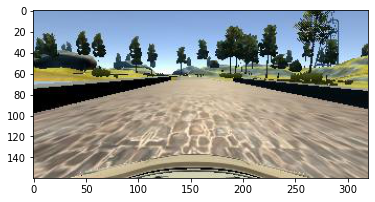

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg

Image_list = os.listdir("data/IMG/")
y_data_csv  = pd.read_csv('data/driving_log.csv')

print(y_data_csv['center'][1])

center_image = mpimg.imread('data/'+y_data_csv['center'][1])
print('This image is:', type(center_image), 'with dimensions:', center_image.shape)
plt.imshow(center_image)

X_data = []
y_data = []
for row in range(len(y_data_csv)):
    center_image = mpimg.imread('data/'+y_data_csv['center'][row])  
    left__image  = mpimg.imread('data/'+y_data_csv['left'][row]) 
    right__image = mpimg.imread('data/'+y_data_csv['right'][row]) 
    X_data.append(center_image,left__image,right__image)
    for i in range(3):
        y_data.append(y_data_csv['steering'][row])
        


## Check if the data sets coherent

In [46]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

assert(len(X_data) == len(X_data))

# Transform the data into np.arrays for the net
X_data = np.array(X_data)
y_data = np.array(y_data)

# shuffle the data
X_data, y_data = shuffle(X_data, y_data)

X_train, X_valid, y_train, y_valid = train_test_split(X_data, y_data, test_size=0.2, random_state=42)


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [47]:
import pandas as pd

# TODO: Number of training examples
n_train = len(X_data)

# TODO: Number of training lables
n_y_train = len(y_data)



print("Number of training samples =", n_train)
print("Number of training labels =", n_y_train)


Number of training samples = 0
Number of training labels = 0


# Step 1: Dataset Summary & Exploration

Provide a Basic Summary of the Data Set
---

In [ ]:
# Number of training examples
n_train = X_data.shape[0]

# Number of data lables
n_y_train = y_data.shape[0]

#  What's the shape of an traffic sign image?
image_shape = train['sizes'][4]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(list(set(y_train)))

print("Number of training samples =", n_train)
print("Number of training labels =", n_train)
print("Number of testing samples =", n_test)
print("Image data shape =", image_shape[0],image_shape[1])
print("Number of classes =", n_classes)